# Data-Centric AI and Data Profiling - Health Insurance
*By: Francisco da Ana (up202108762)*

For this assignement related to data profiling, I chose a dataset with information about customers whose health insurance status is known.

We will use the following libraries:
- **Pandas** for data manipulation
- **Matplotlib** and **Seaborn** for data visualization
- **Pandas Profiling** for generating a visual and general report about the dataset

In [4]:
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

Let's start by loading the dataset to a dataframe and verify its general structure.

In [58]:
df = pd.read_csv('../../data/customer.csv')
df.shape

(72458, 15)

As we can see, the dataset contains 72458 records and 15 columns.

In [3]:
df.columns

Index(['Unnamed: 0', 'custid', 'sex', 'is_employed', 'income',
       'marital_status', 'health_ins', 'housing_type', 'num_vehicles', 'age',
       'state_of_res', 'code_column', 'gas_usage', 'rooms', 'recent_move_b'],
      dtype='object')

Before exploring the statistical properties of the dataset, let's first look at the columns and their meanings, in the context of our problem.

The columns are:
- _unnamed_: an index column
- **custid**: the unique ID of the customer
- **sex**: the gender of the customer
- **is_employed**: indicates whether the customer is employed or not
- **income**: numerical value representing the customer's income
- **marital_status**: the marital status of the customer
- **health_ins**: indicates whether the customer has health insurance or not. This can be the target variable in the context of a classification problem.
- **housing_type**: describes the situation of the customer's habitation
- **num_vehicles**: the number of vehicles the customer owns
- **age**: the age of the customer in years
- **state_of_res**: the US state where the customer resides
- **code_column**: likely a categorical or code-based feature (potentially related to location or demographics).
- **gas_usage**: a measure of the customer's gas usage
- **rooms**: the number of rooms in the customer's house
- **recent_move_b**: indicator if the customer has recently moved

Now, I will use **YData Profiling** to generate a general report about this dataset. The report will be available in a file called `report.html`. Then, using the insights from this report, I'll explore some statistics to better understand the dataset.

In [4]:
profile = ProfileReport(df, title='report', explorative=True)
profile.to_file("data-report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### **First general observations**

<img src='imgs/general-infos.png' width=600>

- As already mentioned, the dataset contains 72458 records and 15 columns.
- There are 32260 miss values (3%). It's a considerable amount of missing values, which may require some attention.
- There are not duplicated records.

<img src='imgs/var-types.png' width=600>

- Variable types:
    - Numeric: _unnamed_, income, num_vehicles, age, gas_usage, rooms;
    - Categorical: sex, marital_status, housing_type, code_column;
    - Boolean: is_employed, health_ins, recent_move_b;
    - Text: custid, state_of_res.

## **Feature accessessment**

Now let's take a look at the characteristics of our dataset's features, such as the data type, the number of unique values, distribution of the values, etc. These individual insights can help us to understand the dataset better and to identify potential problems.

#### **_Unnamed_** and **custid**
Both these features indicate a unique value for each record. The _unnamed_ column is likely a numeric index column, while the custid is the unique identifier of the customer using a different format.

<img src='imgs/features/unnamed.png' width=400>
<img src='imgs/features/custid.png' width=400>

Due to their nature, these features would not be useful in a classification problem which uses only this dataset, since thet don't help the models aggregating information or identifying patterns.

#### **Health Insurance**

<img src='imgs/features/health-ins.png' width=450>

This is a boolean variable. It does not have missing/wrong values. However, it is very imbalanced with 90.5% of the examples being True. This may be a problem in a classification problem, especially for this target variable, since the model may have a bias towards the majority class.

#### **Sex** and **Age**

In terms of gender, there are only two categories represented: Male/Female. The distribution of the values is balanced, with 51.7% of examples being Female and 48.3% being Male. There are no missing values. This is a categorical feature which seems to be well structured.

<img src='imgs/features/sex.png' width=600>

The age feature is a numeric one. There are zeros, which is likely an error in the data, and the maximum registered age is 125. This is probably an outlier, since it's very rare for people to live that long.
Let's look at the rows with age equal to zero.

In [5]:
age_0 = df[df['age'] == 0]
age_0.head()

,Unnamed: 0,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
594,823,000881186_01,Male,True,50000.0,Never married,False,Rented,1.0,0,Alabama,1047,3.0,3,T
1260,1773,000054490_02,Male,False,0.0,Married,True,Rented,0.0,0,Arizona,1534,3.0,4,F
1658,2332,000432667_03,Female,True,24700.0,Never married,True,Rented,3.0,0,Arizona,1534,3.0,5,F
2340,3304,001119983_05,Female,True,2400.0,Divorced/Separated,True,Rented,0.0,0,Arizona,1534,3.0,4,T
2859,4048,000377914_02,Female,NaN,9700.0,Married,True,Homeowner free and clear,3.0,0,Arkansas,653,3.0,2,F


In [6]:
age_0.describe()

,Unnamed: 0,income,num_vehicles,age,code_column,gas_usage,rooms
count,77.000000,77.000000,76.000000,77.0,77.000000,76.000000,77.000000
mean,51351.155844,36672.077922,1.934211,0.0,3417.766234,31.605263,3.532468
std,29856.346859,42400.542118,1.049896,0.0,2867.671189,52.902446,1.721263
min,823.000000,0.000000,0.000000,0.0,146.000000,1.000000,1.000000
25%,19222.000000,8300.000000,1.000000,0.0,1291.000000,3.000000,2.000000
50%,57583.000000,23700.000000,2.000000,0.0,2198.000000,3.000000,4.000000
75%,77987.000000,60000.000000,3.000000,0.0,4979.000000,40.000000,5.000000
max,96887.000000,195000.000000,4.000000,0.0,8962.000000,330.000000,6.000000


We can consider these rows as wrong data and, therefore, they must be treated later.

In [7]:
# What's the minimum age excluding 0?
df[df['age'] > 0]['age'].min()

np.int64(21)

<img src='imgs/features/age.png' width=600>

The mean age is 49.2 years and the median is 48. The distribution is slightly skewed to the right, since there are no records with age below 21 years.

The YData Profiling report does not provide information about gender distribution by age, but it would be interesting to see if there are any patterns in the data.

In [8]:
# Exclude rows with age 0 or age >= 100
df_filtered_age = df[(df['age'] > 0) & (df['age'] < 100)]

# Group by age in 10-year bins
df_filtered_age['age_group'] = pd.cut(df_filtered_age['age'], bins=range(20, 110, 10))

# Count the occurrences for each age group and gender
# Add observed=True to silence the warning
age_gender_counts = df_filtered_age.groupby(['age_group', 'sex'], observed=True).size().unstack()

# Create a stacked bar plot
ax = age_gender_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

# Customize the plot
plt.title('Age Distribution by Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender', title_fontsize=12)
plt.xticks(rotation=45)

# Add value labels on the bars
for c in ax.containers:
    ax.bar_label(c, label_type='center')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('imgs/correlations/age-sex.png')

/var/folders/sv/gxsvk5v96llb5jl5wq8sxllh0000gn/T/ipykernel_84580/257316797.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_age['age_group'] = pd.cut(df_filtered_age['age'], bins=range(20, 110, 10))


<img src='imgs/correlations/age-sex.png' width=750>

The representation of genders by age is balanced!

#### **is_employed** and **income**

<img src='imgs/features/is_employed.png' width=600>

The **is_employed** feature is a boolean one. This is a problematic feature, since there are 25515 (32%) missing values. Among the non-missing values, 95% of them are True, which may indicate a bias in the data. This feature may be useful in a classification problem, but the missing values must be treated, as well as the imbalance in the distribution.

**income** is a numeric feature, which contains values from -6900 to 1257000. The negative values (there are 45) are likely errors in the data.

In [9]:
# Mean of positive incomes
df[df['income'] > 0]['income'].mean()

np.float64(46176.96091111044)

In [10]:
# plot health_ins by each category of is_employed

health_ins_by_employed = df_filtered_age.groupby(['is_employed', 'health_ins']).size().unstack()

ax = health_ins_by_employed.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Health Insurance by Employment Status', fontsize=16)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Health Insurance', title_fontsize=12)
plt.xticks(rotation=0)

for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.tight_layout()
plt.savefig('imgs/correlations/health_ins-is_employed.png')

In [11]:
# Group by income in 10k bins (from 0 to 250k) and see their relation with health insurance
df_filtered_age['income_group'] = pd.cut(df_filtered_age['income'], bins=range(0, 260, 10))
income_insurance_counts = df_filtered_age.groupby(['income_group', 'health_ins'], observed=True).size().unstack()

# Create a stacked bar plot
ax = income_insurance_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

# Customize the plot
plt.title('Income Distribution by Health Insurance', fontsize=16)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Health Insurance', title_fontsize=12)
plt.xticks(rotation=45)

# Add value labels on the bars
for c in ax.containers:
    ax.bar_label(c, label_type='center')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('imgs/correlations/health_ins-income.png')

/var/folders/sv/gxsvk5v96llb5jl5wq8sxllh0000gn/T/ipykernel_84580/2686454428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_age['income_group'] = pd.cut(df_filtered_age['income'], bins=range(0, 260, 10))


<img src='imgs/correlations/health_ins-is_employed.png' width=600>
<img src='imgs/correlations/health_ins-income.png' width=600>

As we can see, across all income levels, the customers predominantly have health insurance. 

Among the **unemplyed** customers, **75%** of them have health insurance and, among the **employed** customers, **90%** of them have health insurance.

In [12]:
# How is age related to income?
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered_age, x='age', y='income')
plt.title('Age vs Income', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.tight_layout()
plt.savefig('imgs/correlations/age-income.png')

<img src='imgs/correlations/age-income.png' width=600>

People with ages between 40 and 80 years old are more likely to have "exorbitant" incomes.

#### **Marital Status**

In [13]:
df['marital_status'].value_counts()/df.shape[0]

marital_status
Married               0.524994
Never married         0.263877
Divorced/Separated    0.145905
Widowed               0.065224
Name: count, dtype: float64

There are 4 different categories for marital status: Married, Never Married, Divorced/Separated, Widowed. There is a predominance of the Married category, with 52.5% of the examples. There are no missing values.

#### **Housing Type** and **Rooms**

<img src='imgs/features/housing_type.png' width=450>

The **housing type** feature has 4 categories:  Homeowner with mortgage/loan, Rented,  Homeowner free and clear,  Occupied with no rent. There is a little predominance of the Homeowner with mortgage/loan category, with 42.9% of the examples. There are 2.3% missing values, which may require some attention.

<img src='imgs/features/rooms.png' width=450>

The **rooms** feature is a numeric one, with values ranging from 0 to 6. The values seem to be very well distributed, with no missing or wrong values.

#### **Number of vehicles** and **Gas Usage**

<img src='imgs/features/num_vehicles.png' width=600>

The **num_vehicles** feature is a numeric one, with values ranging from 0 to 6. There are some missing values (2.3%) wich may require some attention. The **zeros** alert indicated in the report is not a problem, since it is possible for a person not to have a vehicle.
The most frequent value is 2, with 38.7% of the examples.

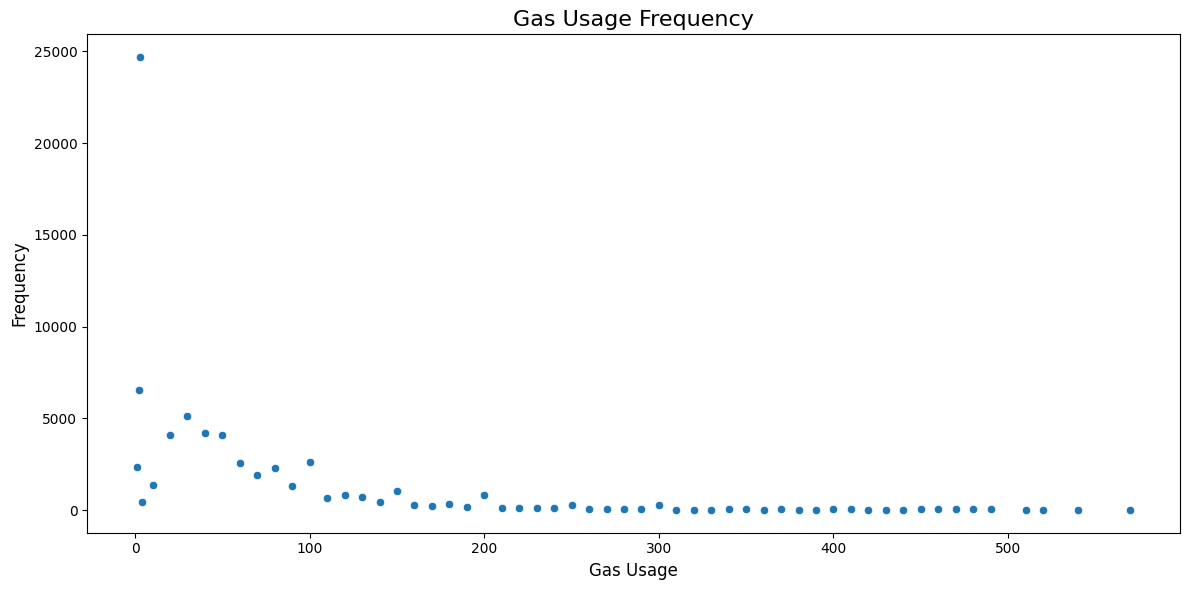

In [75]:
# Scatterplot with the frequency of gas usage values.

# Calculate the frequency of each gas usage value
gas_usage_counts = df['gas_usage'].value_counts().reset_index()
gas_usage_counts.columns = ['gas_usage', 'frequency']

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=gas_usage_counts, x='gas_usage', y='frequency')
plt.title('Gas Usage Frequency', fontsize=16)
plt.xlabel('Gas Usage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.savefig('imgs/features/gas_usage-frequency.png')

<img src='imgs/features/gas_usage.png' width=500>
<img src='imgs/features/gas_usage-frequency.png' width=500>

The measure of **gas usage** is a numeric feature, with values ranging from 1 to 570. There are 2.3% of missing values, most of the values are concentrated between 1 and 100.

#### **State of Residence** and **Recent Move**

In [15]:
df['state_of_res'].value_counts().head(10)/df.shape[0]*100

state_of_res
California        12.241574
Texas              8.195092
Florida            6.791521
New York           6.037981
Pennsylvania       4.096166
Illinois           3.996798
Ohio               3.570344
North Carolina     3.214276
Michigan           3.099727
Georgia            3.004499
Name: count, dtype: float64

In [16]:
df['state_of_res'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

The most represented state is California, with 12.2% of the examples. Texas, Florida and New York are the next most represented states. There are no missing values nor wrong values.

<img src='imgs/features/recent_move.png' width=600>

The **recent move** feature is a boolean one, with 2.3% of missing values. The distribution of the values is not balanced, with 85.4% of the examples being False.

In [17]:
# States with most recent moves. Filter for recent moves = True
recent_moves = df[df['recent_move_b'] == 'T']

# Group by state of residence and count the number of recent moves
recent_moves['state_of_res'].value_counts().head(5)

state_of_res
California    1001
Texas          885
Florida        661
New York       380
Illinois       345
Name: count, dtype: int64

The state with more cases of recent moves is **California**.

In [18]:
# What age do people move the most?
recent_moves['age_group'] = pd.cut(recent_moves['age'], bins=range(20, 110, 10))
age_recent_moves = recent_moves.groupby('age_group').size()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=age_recent_moves.index, y=age_recent_moves.values, palette='viridis')

# Customize the plot
plt.title('Recent Moves by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('imgs/correlations/age-recent_moves.png')

/var/folders/sv/gxsvk5v96llb5jl5wq8sxllh0000gn/T/ipykernel_84580/2879923828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_moves['age_group'] = pd.cut(recent_moves['age'], bins=range(20, 110, 10))
/var/folders/sv/gxsvk5v96llb5jl5wq8sxllh0000gn/T/ipykernel_84580/2879923828.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_recent_moves = recent_moves.groupby('age_group').size()
/var/folders/sv/gxsvk5v96llb5jl5wq8sxllh0000gn/T/ipykernel_84580/2879923828.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

<img src='imgs/correlations/age-recent_moves.png' width=600>

As expected, the older the customers, the less likely they are to have recently moved.

## **Correlation Analysis**

<img src='imgs/correlation-matrix.png' width=500>

There are not many strong correlations between the features. The most significant ones are between the **marital status** and **age** features - which is expected, knowing that marital status is very likely related to the evolution of each individual's life.

**Housing type** and **recent move** are also a bit correlated.

In [19]:
# Correlation between marital status and and age

# Group by marital status and calculate the average age
marital_age = df_filtered_age.groupby('marital_status')['age'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=marital_age.index, y=marital_age.values, palette='viridis')

# Customize the plot
plt.title('Average Age by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.xticks(rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('imgs/correlations/age-marital_status.png')

/var/folders/sv/gxsvk5v96llb5jl5wq8sxllh0000gn/T/ipykernel_84580/1018264908.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marital_age.index, y=marital_age.values, palette='viridis')


<img src='imgs/correlations/age-marital_status.png' width=700>

Never married people tend to be younger, while widowed people tend to be older. Between these average ages there are the divorced/separated and married people.

In [20]:
# Correlation between housing type and recent moves

housing_recent_moves = recent_moves.groupby(['housing_type']).size()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=housing_recent_moves.index, y=housing_recent_moves.values, palette='viridis')

# Customize the plot
plt.title('Recent Moves by Housing Type', fontsize=16)
plt.xlabel('Housing Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('imgs/correlations/recent_moves-housing_type.png')

/var/folders/sv/gxsvk5v96llb5jl5wq8sxllh0000gn/T/ipykernel_84580/1665147432.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=housing_recent_moves.index, y=housing_recent_moves.values, palette='viridis')


<img src='imgs/correlations/recent_moves-housing_type.png' width=700>

People who have recently moved are more likely to be renters.

## **Data quality alerts**

After looking at the features individually, most of their problems were already identified. Let's look at the report's summary of data quality alerts.

<img src='imgs/alerts.png' width=450>

In general, there are not many columns with an huge amount of **missing values**. The most problematic column is **is_employed**, with a considerable number of null cases when compared to the other features.

<img src='imgs/missing-values.png' width=550>

Outliers are present in the **age** and **income** features. The **age** feature has zero values and a very high maximum value, which is likely an outlier. The **income** feature has negative values, which are likely errors in the data.

**Unique identifiers** are present in the **custid** and **_unnamed_** columns. These columns are not useful for a classification problem, since they don't provide any information about subgroups or patterns in the data.

In [59]:
len(df.code_column.unique())

49

In [72]:
#Correlation between code_column and state_of_res(use corr method)
#encode the state_of_Res

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['state_of_res'] = label_encoder.fit_transform(df['state_of_res'])
df['code_column'].corr(df['state_of_res'])

np.float64(-0.2942099864724962)

In [60]:
len(df.state_of_res.unique())

51

In [73]:
# for each code, count the number of states which have that code

state_codes = df.groupby('state_of_res')['code_column'].nunique()
state_codes


state_of_res
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
Name: code_column, dtype: int64

In [62]:
state_codes[state_codes > 1]

Series([], Name: code_column, dtype: int64)

Correlation coefficient: nan


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


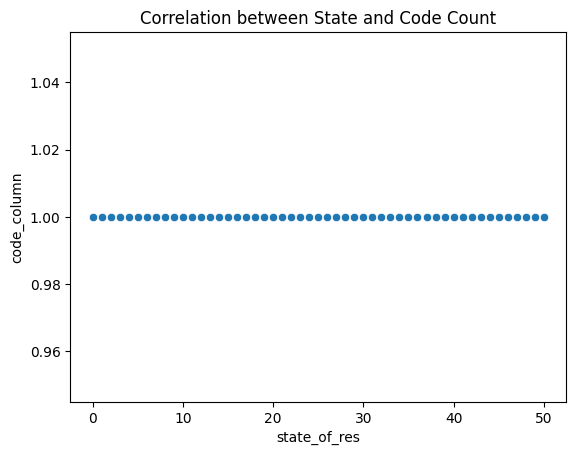

In [74]:
state_codes_df = state_codes.reset_index()

# Calculate correlation
correlation = state_codes_df['state_of_res'].corr(state_codes_df['code_column'])

print(f"Correlation coefficient: {correlation}")

sns.scatterplot(data=state_codes_df, x='state_of_res', y='code_column')
plt.title('Correlation between State and Code Count')
plt.show()